<a href="https://colab.research.google.com/github/andrewb1243/LSTM-Time-Series-Prediction-CCE/blob/main/LSTM_Vanilla_Network_Emulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
import os
import numpy as pd
import pandas as pd


file_location = 'https://raw.githubusercontent.com/andrewb1243/Datasets/master/data3.csv'

first_dataset = pd.read_csv(file_location)

first_dataset.head()

,Time,Throughput
0,3.5,0.004096
1,4.0,0.004096
2,4.5,0.004096
3,5.0,0.666432
4,5.5,1.645952


In [31]:
first_dataset_indexed = first_dataset.set_index(['Time'])
first_dataset_indexed.head()

,Throughput
Time,
3.5,0.004096
4.0,0.004096
4.5,0.004096
5.0,0.666432
5.5,1.645952


<AxesSubplot:xlabel='Time'>

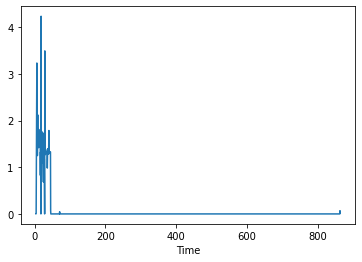

In [32]:
throughput = first_dataset_indexed["Throughput"]
throughput.plot()

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
first_dataset_scaled = scaler.fit_transform(first_dataset_indexed)
print(first_dataset_scaled)


[[0.0009674 ]
 [0.0009674 ]
 [0.0009674 ]
 ...
 [0.        ]
 [0.01627946]
 [0.00542649]]


In [7]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(first_dataset_scaled, test_size = 0.10, shuffle = False)

In [8]:
from keras.preprocessing.sequence import TimeseriesGenerator 

n_input = 2
n_features = 1

generatorTrain = TimeseriesGenerator(train, train, length=n_input, batch_size=2)
generatorTest = TimeseriesGenerator(test, test, length=n_input, batch_size=1)

In [9]:
print(train)


[[0.0009674]
 [0.0009674]
 [0.0009674]
 ...
 [0.       ]
 [0.       ]
 [0.       ]]


In [10]:
batch_0 = generatorTrain[0]
x ,y = batch_0
print(x,y)

[[[0.0009674]
  [0.0009674]]

 [[0.0009674]
  [0.0009674]]] [[0.0009674 ]
 [0.15739831]]


In [11]:
#number of samples
print("Samples: %d" % len(generatorTrain))
#print each sample
for i in range(len(generatorTrain)):
  x, y = generatorTrain[i]
  print('%s => %s' % (x , y))

Samples: 773
[[[0.0009674]
  [0.0009674]]

 [[0.0009674]
  [0.0009674]]] => [[0.0009674 ]
 [0.15739831]]
[[[0.0009674 ]
  [0.15739831]]

 [[0.15739831]
  [0.38874193]]] => [[0.38874193]
 [0.63706033]]
[[[0.38874193]
  [0.63706033]]

 [[0.63706033]
  [0.76345663]]] => [[0.76345663]
 [0.38775942]]
[[[0.76345663]
  [0.38775942]]

 [[0.38775942]
  [0.515108  ]]] => [[0.515108  ]
 [0.29493478]]
[[[0.515108  ]
  [0.29493478]]

 [[0.29493478]
  [0.39004187]]] => [[0.39004187]
 [0.50108076]]
[[[0.39004187]
  [0.50108076]]

 [[0.50108076]
  [0.3523739 ]]] => [[0.3523739 ]
 [0.41330471]]
[[[0.3523739 ]
  [0.41330471]]

 [[0.41330471]
  [0.40025999]]] => [[0.40025999]
 [0.39255105]]
[[[0.40025999]
  [0.39255105]]

 [[0.39255105]
  [0.33514216]]] => [[0.33514216]
 [0.42739242]]
[[[0.33514216]
  [0.42739242]]

 [[0.42739242]
  [0.38940702]]] => [[0.38940702]
 [0.36770107]]
[[[0.38940702]
  [0.36770107]]

 [[0.36770107]
  [0.37312756]]] => [[0.37312756]
 [0.36227459]]
[[[0.37312756]
  [0.36227459]]


In [12]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM 

In [13]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(300, activation = 'tanh',input_shape=(n_input, n_features)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300)               362400    
                                                                 
 dense (Dense)               (None, 1)                 301       
                                                                 
Total params: 362,701
Trainable params: 362,701
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='mse')
model.fit(generatorTrain, epochs=100, batch_size=15, shuffle=False)


Epoch 1/100
773/773 [==============================] - 13s 14ms/step - loss: 0.0030
Epoch 2/100
773/773 [==============================] - 11s 14ms/step - loss: 0.0024
Epoch 3/100
773/773 [==============================] - 11s 14ms/step - loss: 0.0028
Epoch 4/100
773/773 [==============================] - 10s 12ms/step - loss: 0.0028
Epoch 5/100
773/773 [==============================] - 11s 14ms/step - loss: 0.0026
Epoch 6/100
773/773 [==============================] - 10s 13ms/step - loss: 0.0024
Epoch 7/100
773/773 [==============================] - 10s 13ms/step - loss: 0.0023
Epoch 8/100
773/773 [==============================] - 10s 13ms/step - loss: 0.0022
Epoch 9/100
773/773 [==============================] - 10s 13ms/step - loss: 0.0021
Epoch 10/100
773/773 [==============================] - 10s 13ms/step - loss: 0.0020
Epoch 11/100
773/773 [==============================] - 10s 13ms/step - loss: 0.0020
Epoch 12/100
773/773 [==============================] - 10s 13ms/step - lo

In [15]:
import numpy as np

predictions = []

first_batch = train[-n_input:]
current_batch = first_batch.reshape((1, n_input, n_features))
print(current_batch)

for i in range(len(test)):
  #get the prediction value for first
  current_pred = model.predict(current_batch)[0]

  #append the prediction into array
  predictions.append(current_pred)

  #remove the first value
  current_batch_rmv_frist = current_batch[:,1:,:]
  #update the batch
  current_batch = np.append(current_batch_rmv_frist,[[current_pred]],axis=1)

print([i[0] for i in predictions])


[[[0.]
  [0.]]]
1/1 [==============================] - 0s 36ms/step
[1.4901161e-08, 2.9802322e-08, 7.4505806e-08, 1.3411045e-07, 2.8312206e-07, 4.61936e-07, 9.983778e-07, 1.6093254e-06, 3.5613775e-06, 5.5879354e-06, 1.2606382e-05, 1.9401312e-05, 4.4688582e-05, 6.7293644e-05, 0.00015847385, 0.00023281574, 0.0005621016, 0.00080269575, 0.0019889325, 0.0027484894, 0.0069616586, 0.009237289, 0.023410983, 0.029381268, 0.06916327, 0.08013498, 0.14812139, 0.15789632, 0.20672676, 0.21265148, 0.22939193, 0.23242596, 0.23668426, 0.23780984, 0.2388386, 0.23918977, 0.23944202, 0.2395432, 0.23960644, 0.2396344, 0.23965062, 0.23965818, 0.23966235, 0.23966438, 0.23966545, 0.23966599, 0.23966628, 0.23966643, 0.23966652, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655, 0.23966655,

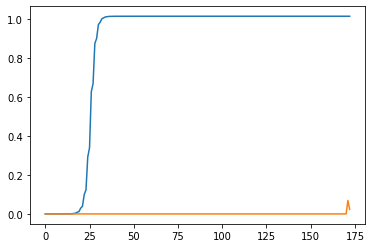

In [16]:
import matplotlib.pyplot as plt

predictions_actual_size = scaler.inverse_transform(predictions)
test_data_actual_scale = scaler.inverse_transform(test)

plt.plot(predictions_actual_size)
plt.plot(test_data_actual_scale)

In [18]:
from sklearn.metrics import accuracy_score, mean_squared_error

mean_squared_error(test,predictions)

0.048208166741635916

In [19]:
import pickle

#save
with open('VanillaEpoch300.pkl','wb') as f:
  pickle.dump(model,f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-03-08 22:14:46      4372712
config.json                                    2023-03-08 22:14:46         1786
metadata.json                                  2023-03-08 22:14:46           64
